In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
import os

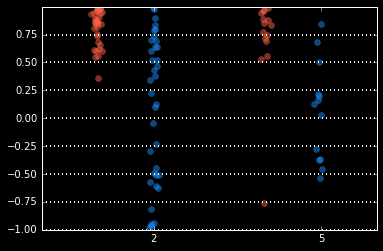

In [45]:
names_for_expt = ['WYK8440_Pol','Cdc24deltaPB1_Pol', 'GEF_Dead_Pol']
names_for_control = ['WYK8440_Pol_Control', 'Cdc24deltaPB1_Control', 'GEF_Dead_Control']

#bem1_expt = ['WYK8308_Pol_Expt','DS377_Expt', 'DS381_PolarizationEff', 'DS382_PolarizationEff']
#bem1_control = ['WYK8308_Pol_Control', 'DS377_Control', 'DS381_Control', 'DS382_Control']

#names_for_expt = ['WYK8308_Pol_Expt', 'DS382_PolarizationEff']
#names_for_control = ['WYK8308_Pol_Control', 'DS382_Control']

expt_dir = '/Users/Kristen/Documents/Images/Old_Desktop/PositiveFeedback_Data/Figure3_Done/Cdc24_Variants_Polarization/Expt'
control_dir = '/Users/Kristen/Documents/Images/Old_Desktop/PositiveFeedback_Data/Figure3_Done/Cdc24_Variants_Polarization/Control'

def extract_all_data(directory, file_names):
    extracted_pol = {}
    extracted_sem = {}
    extracted_ave = {}
    for name in os.listdir(directory): 
        curr_dir = os.path.join(directory, name)
        for f in os.listdir(curr_dir):
            #print curr_dir
            if f == "new_bud_vs_target.csv" or f == "Polarization_Efficiency.csv":
                current_file = os.path.join(curr_dir, f)
                data = pd.read_csv(current_file)
                rads = np.asarray(data['Radians'])
                pol_eff = []
                for r in rads:
                    pol = 1-2*(np.mean(r)/np.pi)
                    pol_eff.append(pol)
                std = np.std(np.asarray(pol_eff))
                num_cells = float(len(pol_eff))
                sem = std/(math.sqrt(num_cells))
            
                extracted_pol[name] = pol_eff
                extracted_sem[name] = sem
                extracted_ave[name] = np.mean(pol_eff)
                
    data_pol = []
    data_ave = []
    data_sem = []
    for curr_data in file_names:
        pol = extracted_pol[curr_data]
        data_pol.append(pol)
    
        ave = extracted_ave[curr_data]
        data_ave.append(ave)
    
        sem = extracted_sem[curr_data]
        data_sem.append(sem)
    return data_pol, data_ave, data_sem


expt_pol, expt_ave, expt_sem = extract_all_data(expt_dir, names_for_expt)
control_pol, control_ave, control_sem = extract_all_data(control_dir, names_for_control)

expt_positions = [1,4,7]
control_positions = [2,5,8]

plt.style.use("dark_background")
fig = plt.figure()
ax = fig.gca()

whiskerprops = dict(linestyle='')
medianprops = dict(linestyle='')
meanlineprops = dict(linestyle='-', color='w')

expt_bp = plt.boxplot(expt_pol, positions=expt_positions, showbox=False, showcaps=False, meanprops=meanlineprops, meanline=True, showmeans=True, medianprops=medianprops, showfliers=False, whiskerprops=whiskerprops)
control_bp = plt.boxplot(control_pol, positions=control_positions, showbox=False, showcaps=False, meanprops=meanlineprops, meanline=True, showmeans=True, medianprops=medianprops, showfliers=False, whiskerprops=whiskerprops)
for i, n in enumerate(expt_positions):
    y = expt_pol[i]
    x = np.random.normal(n, 0.04, size=len(y))
    plt.plot(x, y, color='#ff6347', marker='.', linestyle='', markersize=12, alpha=1.5)
    
for i, n in enumerate(control_positions):
    y = control_pol[i]
    x = np.random.normal(n, 0.04, size=len(y))
    plt.plot(x, y, color='#1e90ff', marker='.', linestyle='', markersize=12, alpha=1.5)
    
plt.errorbar(expt_positions, expt_ave, yerr=expt_sem, fmt=None, ecolor='w')
plt.errorbar(control_positions, control_ave, yerr=control_sem, fmt=None, ecolor='w')
    
plt.xlim(0,6)
plt.ylim(-1,1)
ax.set_yticks(np.arange(-1.0,1,0.25))
plt.rc('grid', linestyle=":", color='white', linewidth=2)
ax.yaxis.grid()
#plt.style.use("dark_background")

save_to = '/Users/Kristen/Documents/Thesis/Images/Cdc24Variants_PolEff_Scatter.pdf'
#plt.savefig(save_to)

plt.show()

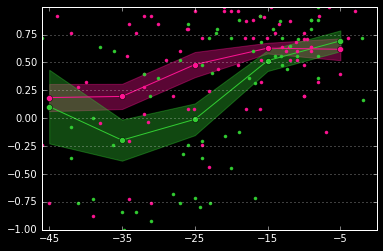

In [13]:
cdc24_aves = np.asarray([0.185,0.194975149,0.480116328,0.62790435,0.617533401])
cdc24_sem = np.asarray([0.121802679,0.113009193,0.112952324,0.047820483,0.097968336])
bem1_aves = np.asarray([0.104,-0.19677372,-0.009990297,0.515494087,0.693333333])
bem1_sem = np.asarray([0.329993939,0.183995626,0.142374284,0.092623438,0.093094934])

cdc24_raw = pd.read_csv('/Users/Kristen/Documents/Images/Old_Desktop/PositiveFeedback_Data/Figure6_Done/Data/Cdc24_Transient.csv')
bem1_raw = pd.read_csv('/Users/Kristen/Documents/Images/Old_Desktop/PositiveFeedback_Data/Figure6_Done/Data/Bem1_Transient.csv')

cdc24_negative_error = np.asarray([a-b for a, b in zip(cdc24_aves, cdc24_sem)])
cdc24_positive_error = np.asarray([a+b for a, b in zip(cdc24_aves, cdc24_sem)])

bem1_negative_error = np.asarray([a-b for a, b in zip(bem1_aves, bem1_sem)])
bem1_positive_error = np.asarray([a+b for a, b in zip(bem1_aves, bem1_sem)])

xs = [-45,-35,-25,-15,-5]

plt.style.use("dark_background")
fig = plt.figure()
ax = fig.gca()
plt.plot(xs, bem1_aves, color="#32cd32", marker='o')
plt.plot(xs,cdc24_aves, color="#ff1493", marker='o')

#plt.plot(xs, negative_error)
plt.fill_between(xs, cdc24_negative_error, cdc24_positive_error, alpha=0.2, edgecolor='#ff1493', facecolor='#ff1493')
plt.fill_between(xs, cdc24_negative_error, cdc24_positive_error, alpha=0.2, edgecolor='#ff1493', facecolor='#ff1493')
plt.fill_between(xs, bem1_negative_error, bem1_positive_error, alpha=0.2, edgecolor='#32cd32', facecolor='#32cd32')
plt.fill_between(xs, bem1_negative_error, bem1_positive_error, alpha=0.2, edgecolor='#32cd32', facecolor='#32cd32')
plt.xlim(-46,0)
plt.ylim(-1,1)
ax.set_yticks(np.arange(-1.0,1,0.25))
ax.set_xticks(np.arange(-45,0,10))
plt.rc('grid', linestyle=":", color='white')
ax.yaxis.grid()

cdc24_xs = np.asarray(cdc24_raw['Time'])

cdc24_ys = np.asarray(cdc24_raw['Pol'])

bem1_xs = np.asarray(bem1_raw['Time'])

bem1_ys = np.asarray(bem1_raw['Pol'])


for i, n in enumerate(list(cdc24_xs)):
    y = cdc24_ys[i]
    x = np.random.normal(n, 0.04)
    plt.plot(x, y, color='#ff1493', marker='.', linestyle='')
    
for i, n in enumerate(list(bem1_xs)):
    y = bem1_ys[i]
    x = np.random.normal(n, 0.04)
    plt.plot(x, y, color='#32cd32', marker='.', linestyle='')

save_to = '/Users/Kristen/Documents/Thesis/Images/Cdc24_Bem1_Transient_PolEff.pdf'
plt.savefig(save_to)

plt.show()
#cdc24_raw.head()